<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#Continue-Data-Quality-Exploration" data-toc-modified-id="Continue-Data-Quality-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Continue Data Quality Exploration</a></span><ul class="toc-item"><li><span><a href="#Inspect-Planned-and-Actual-Departure-Times" data-toc-modified-id="Inspect-Planned-and-Actual-Departure-Times-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inspect Planned and Actual Departure Times</a></span></li><li><span><a href="#Inspect-Duplicated-and-Non-Duplicated-Trip_ids-(issue-from-rt_trips)" data-toc-modified-id="Inspect-Duplicated-and-Non-Duplicated-Trip_ids-(issue-from-rt_trips)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Inspect Duplicated and Non-Duplicated Trip_ids (issue from rt_trips)</a></span><ul class="toc-item"><li><span><a href="#Compare-Membership-Trip_ids-in-rt_trips-and-rt_leavetimes" data-toc-modified-id="Compare-Membership-Trip_ids-in-rt_trips-and-rt_leavetimes-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Compare Membership Trip_ids in rt_trips and rt_leavetimes</a></span></li><li><span><a href="#Check-Dates-Represented-in-Year" data-toc-modified-id="Check-Dates-Represented-in-Year-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Check Dates Represented in Year</a></span></li></ul></li></ul></li><li><span><a href="#Export-Line145-(trips-thereof)-for-Sample-Modelling" data-toc-modified-id="Export-Line145-(trips-thereof)-for-Sample-Modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Export Line145 (trips thereof) for Sample Modelling</a></span><ul class="toc-item"><li><span><a href="#FIRST-ATTEMPT-—" data-toc-modified-id="FIRST-ATTEMPT-—-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>FIRST ATTEMPT —</a></span></li><li><span><a href="#SECOND-ATTEMPT" data-toc-modified-id="SECOND-ATTEMPT-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SECOND ATTEMPT</a></span></li></ul></li></ul></div>

# IMPORTS

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:90% !important;}</style>'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
# Display plots in the notebook
%matplotlib inline

In [4]:
def assess_df(df):
  
    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    # check for constant columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
            
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# Continue Data Quality Exploration

One leave time


For one vehicle


For one stop-point

In [5]:
df = pd.read_feather('/tmp/ssh_mount/data/dataframes/020719_postassessquality_leavetimes.feather')

In [3]:
df.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211
1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267
2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263
3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284
4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209


In [102]:
assess_df(df)

Datatypes:

DAYOFSERVICE       datetime64[ns]
TRIPID                   category
PROGRNUMBER              category
STOPPOINTID              category
PLANNEDTIME_ARR             int32
PLANNEDTIME_DEP             int32
ACTUALTIME_ARR              int32
ACTUALTIME_DEP              int32
VEHICLEID                category
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

116949113 rows in the dataframe.
9 columns in the dataframe.

0 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

                       count          mean           std      min      25%  \
PLANNEDTIME_ARR  116949113.0  53263.483617  17496.620711  16200.0  37975.0   
PLANNEDTIME_DEP  116949113.0  53263.483617  17496.620711  16200.0  37975.0   
ACTUALTIME_ARR   116949113.0  53446.370011  17507.103983  15974.0  38105.0   
ACTUALTIME_D

## Inspect Planned and Actual Departure Times

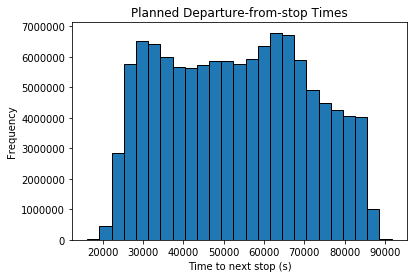

In [7]:
plt.figure()
plt.xlabel('Time to next stop (s)')
plt.title("Planned Departure-from-stop Times")
df.PLANNEDTIME_DEP.plot(kind='hist', bins=25, edgecolor='black')
plt.savefig("Planned Departure-from-stop Times")

Actual

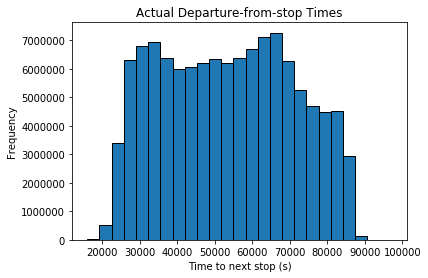

In [8]:
plt.figure()
plt.xlabel('Time to next stop (s)')
plt.title("Actual Departure-from-stop Times")
df.ACTUALTIME_DEP.plot(kind='hist', bins=25, edgecolor='black')
plt.savefig("Actual Departure-from-stop Times")

Closer Inpsect: Lower Bound of Planned Dept Times

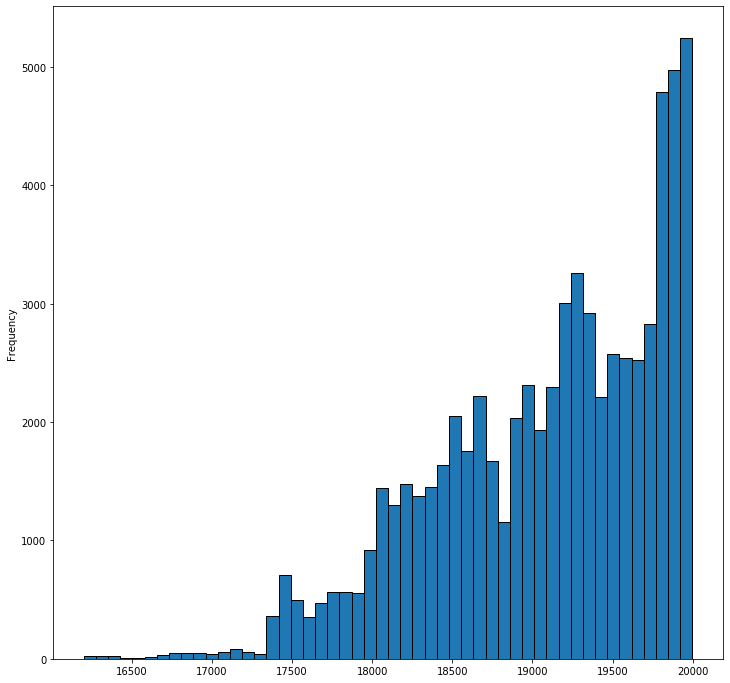

In [16]:
df.loc[df.PLANNEDTIME_DEP < 20000, 'PLANNEDTIME_DEP'].plot(kind='hist', bins=50, figsize=(12,12), edgecolor='black')

In [20]:
# earliest time planned to leave stop

df.PLANNEDTIME_DEP.min() / 60 / 60

4.5

Closer Inpsect: Lower Bound of Actual Dept Times

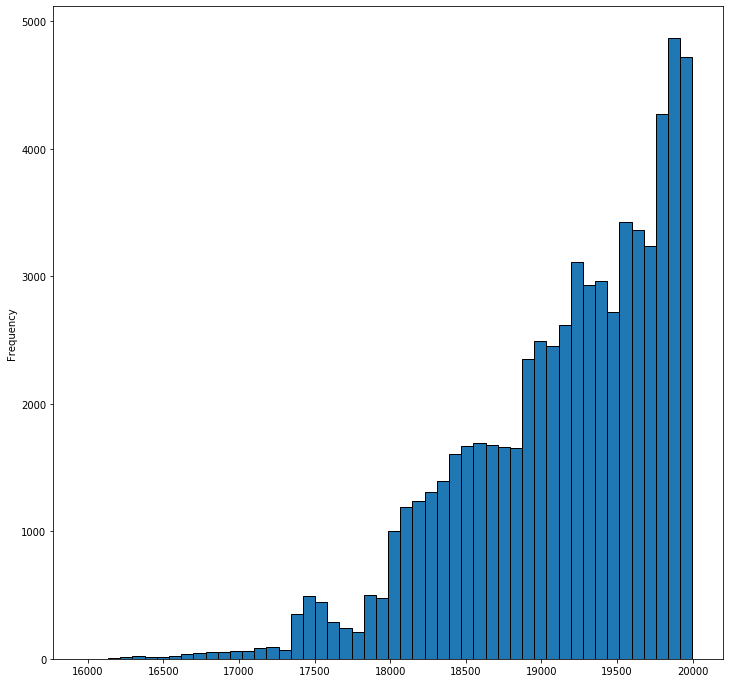

In [17]:
df.loc[df.ACTUALTIME_DEP < 20000, 'ACTUALTIME_DEP'].plot(kind='hist', bins=50, figsize=(12,12), edgecolor='black')

In [21]:
# earliest time leaving current stop

df.ACTUALTIME_DEP.min() / 60 / 60

4.437222222222222

In [24]:
seconds_in_day = 24 * 60 * 60

In [26]:
# number of actual departure times falling after midnight of the operational day

actual_dept_post24 = df.loc[df.ACTUALTIME_DEP > seconds_in_day, 'ACTUALTIME_DEP'].shape[0]
actual_dept_post24

457988

In [31]:
len(df)

116949113

In [32]:
# proportion of whole that these represent

(actual_dept_post24 / len(df)) * 100

0.39161305994685053

## Inspect Duplicated and Non-Duplicated Trip_ids (issue from rt_trips)

In [119]:
# show select columns for a trip_id known to re-occur
# in the rt_trips dataset

with pd.option_context('display.max_rows', None):
    print(df.loc[df.TRIPID == 8026357, ['DAYOFSERVICE', 'TRIPID',\
        'VEHICLEID', 'PROGRNUMBER', 'STOPPOINTID']].sort_values(by=['VEHICLEID', 'DAYOFSERVICE', 'PROGRNUMBER']))

         DAYOFSERVICE   TRIPID VEHICLEID PROGRNUMBER STOPPOINTID
91785393   2018-10-10  8026357   1001141           1        2210
91785413   2018-10-10  8026357   1001141           2        2211
91785434   2018-10-10  8026357   1001141           3        2241
91977905   2018-10-10  8026357   1001141           4        2242
91786572   2018-10-10  8026357   1001141           5        2243
91786595   2018-10-10  8026357   1001141           6        2244
91968901   2018-10-10  8026357   1001141           7        2245
91787727   2018-10-10  8026357   1001141           8        2246
91787749   2018-10-10  8026357   1001141           9        2247
91787768   2018-10-10  8026357   1001141          10        2248
98241544   2018-10-10  8026357   1001141          11        2249
98246378   2018-10-10  8026357   1001141          12        2250
91760132   2018-10-10  8026357   1001141          13        2251
91760152   2018-10-10  8026357   1001141          14        1472
91760173   2018-10-10  80

Different vehicle ids, on different days, running the same trip_id – ADDITIONAL ISSUE: there are differing numbers of seqeuential stops.

Trip follows the same stop-points. 

Where the number of stops in the sequence between instances of trips differs (either 22 or 26 stops, in the case of this trip_id), the longer sequence is simply a continuation of the shorter sequence.

In [112]:
# show select columns for a trip_id known to not re-occur
# in the rt_trips dataset

df.loc[df.TRIPID == 6271460, ['DAYOFSERVICE', 'TRIPID',\
    'VEHICLEID', 'PROGRNUMBER']].sort_values(by='PROGRNUMBER')

,DAYOFSERVICE,TRIPID,VEHICLEID,PROGRNUMBER
11376831,2018-02-18,6271460,2534859,1
11378032,2018-02-18,6271460,2534859,2
11378058,2018-02-18,6271460,2534859,3
11378079,2018-02-18,6271460,2534859,4
11379281,2018-02-18,6271460,2534859,5
11379307,2018-02-18,6271460,2534859,6
11379330,2018-02-18,6271460,2534859,7
11379351,2018-02-18,6271460,2534859,8
19875781,2018-02-18,6271460,2534859,9
11497161,2018-02-18,6271460,2534859,10


### Compare Membership Trip_ids in rt_trips and rt_leavetimes

In [79]:
leavetimes_tripids = df.TRIPID.unique().astype('object')

In [93]:
leavetimes_tripids = pd.Series(leavetimes_tripids)

In [96]:
type(leavetimes_tripids[0])

int

In [100]:
leavetimes_tripids.loc[~leavetimes_tripids.isin(trips_tripsids)]

101187    6253783
dtype: object

In [101]:
trips_tripsids.loc[~trips_tripsids.isin(leavetimes_tripids)]

366733    8465360
536102    8158657
594102    7643159
Name: 6253783, dtype: object

### Check Dates Represented in Year

In [120]:
# earliest timestamp

start_date = df.DAYOFSERVICE.min()
start_date

Timestamp('2018-01-01 00:00:00')

In [121]:
# latest timestamp

end_date = df.DAYOFSERVICE.max()
end_date

Timestamp('2018-12-31 00:00:00')

In [122]:
# define the range of dates

year = pd.date_range(start_date, end_date)

In [123]:
# check which dates from the dataset do 
# not appear in the range

year.difference(df.DAYOFSERVICE.values)

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-12-09', '2018-12-10',
               '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

# Export Line145 (trips thereof) for Sample Modelling

## FIRST ATTEMPT — 

In [124]:
df.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211
1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267
2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263
3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284
4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209


In [1]:
# with open('/tmp/ssh_mount/L145_trial/df_145_trip_ids.csv', 'r') as f:
#   reader = csv.reader(f)
#   df_145_trip_ids = list(reader)

In [2]:
# # unstack

# # df_145_trip_ids = [item for sublist in df_145_trip_ids for item in sublist]

# df_145_trip_ids

In [3]:
# # prep: list to series

# df_145_trip_ids = pd.Series(df_145_trip_ids)

In [4]:
# # prep: series to int type

# df_145_trip_ids = df_145_trip_ids.astype('int32')

In [5]:
# # prep df column to int32, for comparison

# df.TRIPID = df.TRIPID.astype('int32')

In [6]:
# # for each trip id, find all rows, add this partial df to a list
# # repeat for each trip id

# chunks = []

# for i, v in df_145_trip_ids.items():
#     chunks.append(df.loc[df.TRIPID == v, :])


In [7]:
# df_L145_leavetimes = pd.concat(chunks)

In [8]:
# df_L145_leavetimes.shape

In [9]:
# del chunks

In [189]:
# df_L145_leavetimes.reset_index(drop=True, inplace=True)

In [190]:
# df_L145_leavetimes.to_feather('/tmp/ssh_mount/L145_trial/df_L145_leavetimes.feather')

## SECOND ATTEMPT

In [6]:
df.head(2)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211
1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267


In [7]:
df.TRIPID.dtype

CategoricalDtype(categories=[5955221, 5955222, 5955223, 5955224, 5955225, 5955226,
                  5955227, 5955228, 5955229, 5955230,
                  ...
                  8592186, 8592187, 8592188, 8592189, 8592202, 8592203,
                  8592204, 8592205, 8592206, 8592207],
                 ordered=False)

In [8]:
df.TRIPID = df.TRIPID.astype('int32')

In [9]:
df_145_trip_ids = pd.read_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/dataframes/L145/L145_indices.csv',\
                             header=None, squeeze=True, index_col=0)

In [10]:
df_145_trip_ids.head()

0
0    6263611
1    6267386
2    6265005
3    6398012
5    6388460
Name: 1, dtype: int64

In [11]:
df_145_trip_ids.dtype

dtype('int64')

In [12]:
df_145_trip_ids = df_145_trip_ids.astype('int32')

In [13]:
# make a list of dataframes: each containing
# rows from leavetimes corresponding to a 
# trip id (trip_ids correspond to a given line
# number)

chunks = []

for i, v in df_145_trip_ids.items():
    chunks.append(df.loc[df.TRIPID == v, :])

In [14]:
# concatentate the dataframes

df_L145_leavetimes = pd.concat(chunks)

In [15]:
df_L145_leavetimes.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
11345366,2018-02-18,6263611,31,2013,55128,55128,55231,55240,2868334
11345424,2018-02-18,6263611,66,2964,57113,57113,57459,57483,2868334
11345457,2018-02-18,6263611,67,4175,57174,57174,57611,57635,2868334
11346539,2018-02-18,6263611,32,2014,55200,55200,55277,55286,2868334
11346576,2018-02-18,6263611,33,4636,55238,55238,55315,55328,2868334


In [16]:
df_L145_leavetimes.reset_index(drop=True, inplace=True)

In [17]:
df_L145_leavetimes.to_feather('/tmp/ssh_mount/data/dataframes/L145/df_L145_leavetimes.feather')

In [38]:
print(df_L145_leavetimes.info(memory_usage='deep'))
print('\n')
print(df_L145_leavetimes.memory_usage(deep=True))
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4027897 entries, 0 to 4027896
Data columns (total 9 columns):
DAYOFSERVICE       datetime64[ns]
TRIPID             int32
PROGRNUMBER        category
STOPPOINTID        category
PLANNEDTIME_ARR    int32
PLANNEDTIME_DEP    int32
ACTUALTIME_ARR     int32
ACTUALTIME_DEP     int32
VEHICLEID          category
dtypes: category(3), datetime64[ns](1), int32(5)
memory usage: 127.0 MB
None


Index                    80
DAYOFSERVICE       32223176
TRIPID             16111588
PROGRNUMBER         4033889
STOPPOINTID         8257826
PLANNEDTIME_ARR    16111588
PLANNEDTIME_DEP    16111588
ACTUALTIME_ARR     16111588
ACTUALTIME_DEP     16111588
VEHICLEID           8105962
dtype: int64


